<a href="https://colab.research.google.com/github/edotheepic/ComVis/blob/main/UTS_CV/MIDEXAM_2440007226.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MID EXAM

Name : Eduardo Brilliandy

NIM : 2440007226

#### Import all Libraries & Images

In [ ]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from skimage.exposure import match_histograms

!wget https://raw.githubusercontent.com/edotheepic/ComVis/main/UTS_CV/input_image.jpg
!wget https://raw.githubusercontent.com/edotheepic/ComVis/main/UTS_CV/noisy_lena.png
!wget https://raw.githubusercontent.com/edotheepic/ComVis/main/UTS_CV/reference.jpg
!wget https://raw.githubusercontent.com/edotheepic/ComVis/main/UTS_CV/peppers.tiff
!wget https://raw.githubusercontent.com/edotheepic/ComVis/main/UTS_CV/image9.jpg
!wget https://raw.githubusercontent.com/edotheepic/ComVis/main/UTS_CV/stitch1.png
!wget https://raw.githubusercontent.com/edotheepic/ComVis/main/UTS_CV/stitch2.png

## 1. Histogram Matching

In [2]:
#read input & reference image in grayscale
input_img = cv.imread('input_image.jpg', 0)
ref_img = cv.imread('reference.jpg', 0)

#calculate histograms
input_hist, bins = np.histogram(input_img.flatten(), 256, [0, 256])
input_cdf = input_hist.cumsum()
input_cdf_norm = input_cdf/input_cdf.max() * input_hist.max()

ref_hist, bins = np.histogram(ref_img.flatten(), 256, [0, 256])
ref_cdf = ref_hist.cumsum()
ref_cdf_norm = ref_cdf/ref_cdf.max() * ref_hist.max()

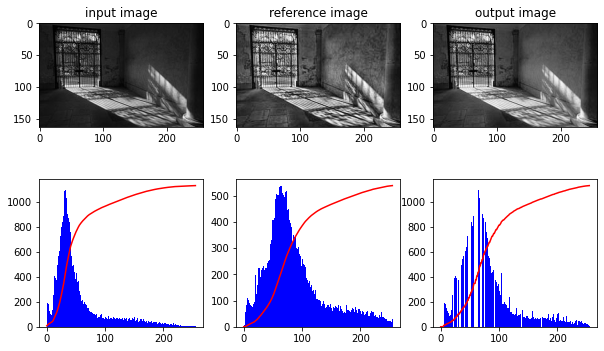

In [3]:
#match input image to reference image
#using match_histogram() function from skimage
output_img = match_histograms(input_img, ref_img)

#calculate output hist
output_hist, bins = np.histogram(output_img.flatten(), 256, [0, 256])
output_cdf = output_hist.cumsum()
output_cdf_norm = output_cdf/output_cdf.max() * output_hist.max()

#show results
plt.figure(figsize=(10,6))

plt.subplot(2, 3, 1)
plt.imshow(input_img, cmap='gray')
plt.title('input image')

plt.subplot(2, 3, 2)
plt.imshow(ref_img, cmap='gray')
plt.title('reference image')

plt.subplot(2, 3, 3)
plt.imshow(output_img, cmap='gray')
plt.title('output image')

plt.subplot(2, 3, 4)
plt.hist(input_img.flatten(),256,[0,256], color = 'b')
plt.plot(input_cdf_norm, color = 'r')

plt.subplot(2, 3, 5)
plt.hist(ref_img.flatten(),256,[0,256], color = 'b')
plt.plot(ref_cdf_norm, color = 'r')

plt.subplot(2, 3, 6)
plt.hist(output_img.flatten(),256,[0,256], color = 'b')
plt.plot(output_cdf_norm, color = 'r')

plt.show()

## 2. Bandpass Filter


In [4]:
#declare function for creating a gaussian filter
def GaussianFilter(M, N, sig):
  filter = np.zeros((M,N), dtype=np.float32)
  for u in range(M):
    for v in range(N):
      D = np.sqrt((u-M/2)**2 + (v-N/2)**2)
      filter[u,v] = np.exp(-D**2/(2*sig*sig))
  
  return filter

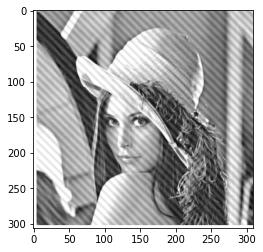

In [5]:
#read image in
noisy_img = cv.imread('noisy_lena.png', 0)

#show image
plt.imshow(noisy_img, cmap='gray')

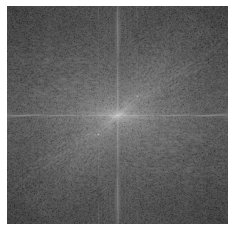

In [6]:
#Apply fourier transform
noisy_img_f = np.fft.fft2(noisy_img)

#Shift low frequency to center
noisy_img_fshift = np.fft.fftshift(noisy_img_f)

#Show transformed image
plt.imshow(np.log1p(abs(noisy_img_fshift)), cmap='gray')
plt.axis('off')
plt.show()

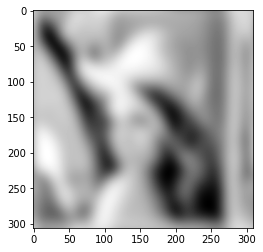

In [7]:
#apply first gaussian filter
M, N = noisy_img.shape
G1 = GaussianFilter(M, N, 5)
G1_noisy_img_fshift = noisy_img_fshift * G1

#inverse fourier transform
G1_noisy_img_f = np.fft.ifftshift(G1_noisy_img_fshift)
G1_noisy_img = np.log1p(abs(np.fft.ifft2(G1_noisy_img_f)))

#show first blurred image
plt.imshow(G1_noisy_img, cmap='gray')

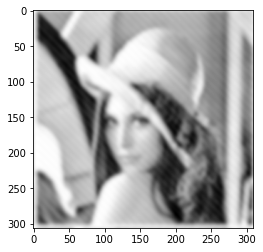

In [8]:
#apply second gaussian image
G2 = GaussianFilter(M, N, 17)
G2_noisy_img_fshift = noisy_img_fshift * G2

#inverse fourier transform
G2_noisy_img_f = np.fft.ifftshift(G2_noisy_img_fshift)
G2_noisy_img = np.log1p(abs(np.fft.ifft2(G2_noisy_img_f)))

#show second blurred image
plt.imshow(G2_noisy_img, cmap='gray')

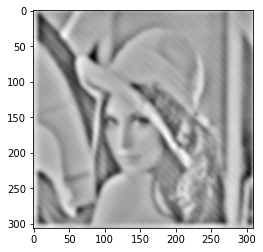

In [9]:
#calculate difference between the 2 filtered image
diff_noisy_img = G2_noisy_img-G1_noisy_img

#apply fourier transform
diff_noisy_img_f = np.fft.fft2(diff_noisy_img)
diff_noisy_img_fshift = np.fft.fftshift(diff_noisy_img_f)

#show bandpass filter result
plt.imshow(diff_noisy_img, cmap='gray')

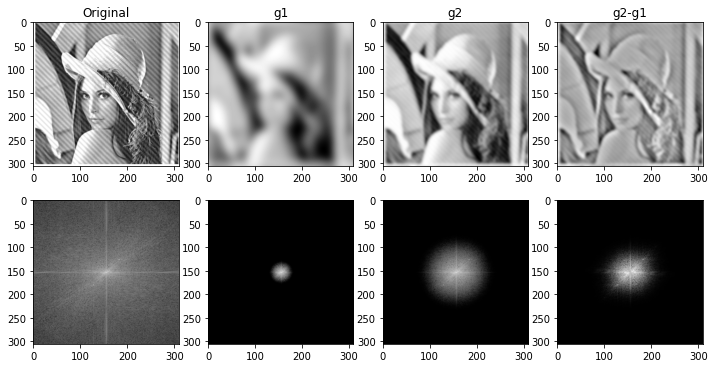

In [10]:
#Show comparisons
plt.figure(figsize=(12,6))

plt.subplot(2, 4, 1)
plt.imshow(noisy_img, cmap='gray')
plt.title("Original")

plt.subplot(2, 4, 2)
plt.imshow(G1_noisy_img, cmap='gray')
plt.title("g1")

plt.subplot(2, 4, 3)
plt.imshow(G2_noisy_img, cmap='gray')
plt.title("g2")

plt.subplot(2, 4, 4)
plt.imshow(diff_noisy_img, cmap='gray')
plt.title("g2-g1")

plt.subplot(2, 4, 5)
plt.imshow(np.log1p(abs(noisy_img_fshift)), cmap='gray')

plt.subplot(2, 4, 6)
plt.imshow(np.log1p(abs(G1_noisy_img_fshift)), cmap='gray')

plt.subplot(2, 4, 7)
plt.imshow(np.log1p(abs(G2_noisy_img_fshift)), cmap='gray')

plt.subplot(2, 4, 8)
plt.imshow(np.log1p(abs(diff_noisy_img_fshift)), cmap='gray')
plt.show()

## 3. Edge Detection

In [11]:
#declare function for sobel
def sobel_xy(img):
  gx = cv.Sobel(np.float32(img), cv.CV_64F, 1, 0, 3)
  gy = cv.Sobel(np.float32(img), cv.CV_64F, 0, 1, 3)

  #get magnitude and angle of the gradient
  mag, ang = cv.cartToPolar(gx, gy, angleInDegrees = True)

  return mag, ang

In [12]:
#declare function for non maximum suppression
def non_maxima_suppression(mag, ang):
  #get the dimensions of the input image  
  height, width = mag.shape

  #copy image to another variable
  nms = mag.copy()

  #loop through every pixel of the image
  for i_x in range(1, width-1):
    for i_y in range(1, height-1):

      #get current angle & clamp the value between 0 tp 180 degrees    
      angle = ang[i_y, i_x]
      angle = abs(angle-180) if abs(angle)>180 else abs(angle)

      #create empty variable to store neighbor magnitude
      p = 0
      q = 0

      #select the neighbours of the target pixel according to the gradient 
      #direction
      #0 degrees (neighbours are left & right)
      if (0 <= angle < 22.5) or (157.5 <= angle <= 180):
        p = mag[i_y,i_x+1]
        q = mag[i_y,i_x-1]
      #45 degrees (neighbours are bottom left & top right)
      elif (22.5 <= angle < 67.5):
        p = mag[i_y+1,i_x+1]
        q = mag[i_y-1,i_x-1]        
      #90 degrees (neighbours are bottom & top)
      elif (67.5 <= angle < 112.5):
        p = mag[i_y+1,i_x]
        q = mag[i_y-1,i_x]
      #135 degrees (neighbours are top left & bottom right)
      elif (112.5 <= angle < 157.5):
        p = mag[i_y-1,i_x+1]
        q = mag[i_y+1,i_x-1]
      
      #suppress non maximum value 
      #if either neighbor is larger, set value to 0
      if(p > mag[i_y,i_x]) or (q > mag[i_y,i_x]):
        nms[i_y,i_x] = 0

  return nms

In [13]:
#declare function for double thresholding
def double_threshold(img, low, high):
  height, width = img.shape

  #create variable to store result
  res = np.zeros((height,width), dtype=np.float32)

  #get maximum value
  img_max = img.max()

  #set thresholds. Strong threshold is double from Weak threshold
  high_th = img_max * high
  low_th = high_th * low

  #set value for magnitudes that are within the threshold
  weak = 100
  strong  = 255

  #double thresholding for each pixel
  for i_x in range(width):
    for i_y in range(height):

      if img[i_y, i_x] < low_th:
        res[i_y, i_x]= 0
      elif low_th <= img[i_y, i_x] < high_th:
        res[i_y, i_x]= weak
      else:
        res[i_y, i_x]= strong

  return res, weak, strong

In [14]:
#declare function for applying hysteresis
def hysteresis(img, weak, strong):
  height, width = img.shape

  res = img.copy()

  #hysteresis for each pixel 
  for i_x in range(1, width-1):
    for i_y in range(1, height-1):
      if (res[i_y,i_x] == weak):
        if ((res[i_y+1, i_x-1] == strong) 
          or (res[i_y+1, i_x] == strong)
          or (res[i_y+1, i_x+1] == strong)
          or (res[i_y, i_x-1] == strong) 
          or (res[i_y, i_x+1] == strong)
          or (res[i_y-1, i_x-1] == strong) 
          or (res[i_y-1, i_x] == strong) 
          or (res[i_y-1, i_x+1] == strong)):
          res[i_y, i_x] = strong
        else:
          res[i_y, i_x] = 0

  return res

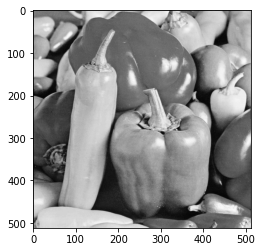

In [15]:
#read image in grayscale
edge_img = cv.imread('peppers.tiff', 0)

#show image
plt.imshow(edge_img, cmap='gray')

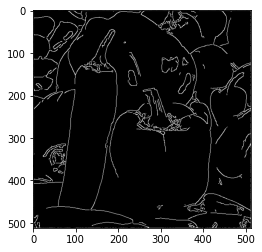

In [16]:
#Canny Edge Detection
edge_img_blur = cv.GaussianBlur(edge_img, (5, 5), 0)
edge_img_mag, edge_img_ang = sobel_xy(edge_img_blur)
edge_img_nms = non_maxima_suppression(edge_img_mag, edge_img_ang)
edge_img_th, weak, strong = double_threshold(edge_img_nms, 0.03, 0.2)
canny = hysteresis(edge_img_th, weak, strong)

#Show result of Canny edge detection
plt.imshow(canny, cmap='gray')

In [17]:
#declare function for determining zero crossing point
def zero_crossing(image):
  z_c_image = np.zeros(image.shape)
    
  #for each pixel, count the number of positive
  #and negative pixels in the neighborhood
  for i in range(1, image.shape[0] - 1):
    for j in range(1, image.shape[1] - 1):
      negative_count = 0
      positive_count = 0
      neighbour = [image[i+1, j-1],image[i+1, j],image[i+1, j+1],
                  image[i, j-1],image[i, j+1],image[i-1, j-1],
                  image[i-1, j],image[i-1, j+1]]
      d = max(neighbour)
      e = min(neighbour)
      for h in neighbour:
        if h>0:
          positive_count += 1
        elif h<0:
          negative_count += 1

      #check if pixel is potential zero crossing
      z_c = ((negative_count > 0) and (positive_count > 0))
            
      #change the pixel value with the max neighborhood difference
      if z_c:
        if image[i,j]>0:
          z_c_image[i, j] = image[i,j] + np.abs(e)
        elif image[i,j]<0:
          z_c_image[i, j] = np.abs(image[i,j]) + d
                
  #normalize
  z_c_norm = z_c_image/z_c_image.max()*255
  z_c_image = np.uint8(z_c_norm)

  return z_c_image

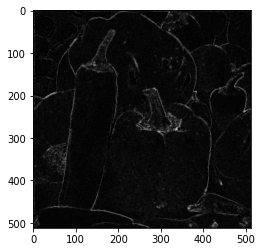

In [18]:
#Laplacian of Gaussian
edge_img_blur = cv.GaussianBlur(edge_img, (3, 3), 0)
edge_img_lap = cv.Laplacian(edge_img_blur, cv.CV_64F)
log = zero_crossing(edge_img_lap)

#show result of LoG
plt.imshow(log, cmap='gray')
plt.show()

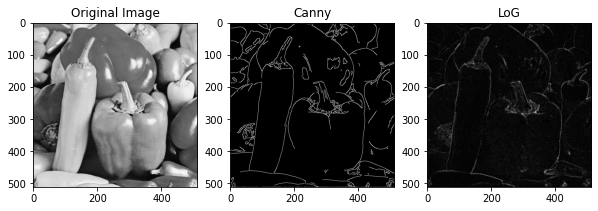

In [19]:
#compare Canny and LoG
plt.figure(figsize=(10,4))

plt.subplot(1, 3, 1)
plt.imshow(edge_img, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 3, 2)
plt.imshow(canny, cmap='gray')
plt.title('Canny')

plt.subplot(1, 3, 3)
plt.imshow(log, cmap='gray')
plt.title('LoG')

plt.show()

## 4. Harris Corner Detection

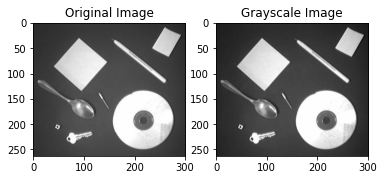

In [20]:
#read image
crn_img = cv.imread('image9.jpg')
#convert img to grayscale
crn_img_gray = cv.cvtColor(crn_img, cv.COLOR_BGR2GRAY)

#show image
plt.subplot(1, 2, 1)
plt.imshow(crn_img)
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(crn_img_gray, cmap='gray')
plt.title('Grayscale Image')

plt.show()

#### a. Compute Gaussian derivatives at each pixel

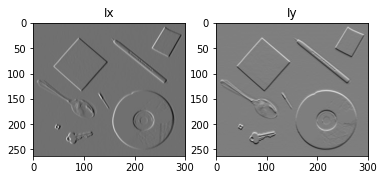

In [21]:
#Sobel for derivative
Ix = cv.Sobel(np.float32(crn_img_gray), cv.CV_64F, 1, 0, 3)
Iy = cv.Sobel(np.float32(crn_img_gray), cv.CV_64F, 0, 1, 3)

#show image derivatives
plt.subplot(1, 2, 1)
plt.imshow(Ix, cmap='gray')
plt.title('Ix')

plt.subplot(1, 2, 2)
plt.imshow(Iy, cmap='gray')
plt.title('Iy')

plt.show()

#### b.  Compute second moment matrix M in a Gaussian window around each pixel

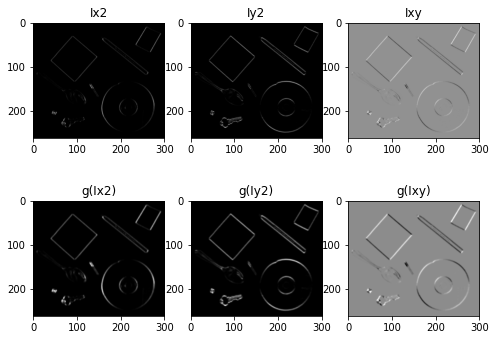

In [22]:
#calculate variables for second moment matrix
Ix2 = np.square(Ix)
Iy2 = np.square(Iy)
Ixy = np.multiply(Ix, Iy)

#apply gaussian filter
Ix2_g = cv.GaussianBlur(Ix2, (3, 3), 1.4)
Iy2_g = cv.GaussianBlur(Iy2, (3, 3), 1.4)
Ixy_g = cv.GaussianBlur(Ixy, (3, 3), 1.4)

#show second moment matrix M
plt.figure(figsize=(8,6))
plt.subplot(2, 3, 1)
plt.imshow(Ix2, cmap='gray')
plt.title('Ix2')

plt.subplot(2, 3, 2)
plt.imshow(Iy2, cmap='gray')
plt.title('Iy2')

plt.subplot(2, 3, 3)
plt.imshow(Ixy, cmap='gray')
plt.title('Ixy')

plt.subplot(2, 3, 4)
plt.imshow(Ix2_g, cmap='gray')
plt.title('g(Ix2)')

plt.subplot(2, 3, 5)
plt.imshow(Iy2_g, cmap='gray')
plt.title('g(Iy2)')

plt.subplot(2, 3, 6)
plt.imshow(Ixy_g, cmap='gray')
plt.title('g(Ixy)')

plt.show()

#### c. Compute corner response function R

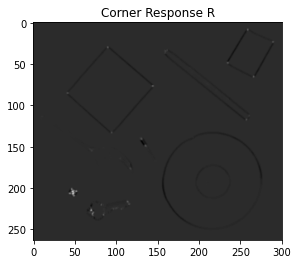

In [23]:
#calculate corner response
alpha = 0.04
R = Ix2_g * Iy2_g - np.square(Ixy_g) - alpha * np.square(Ix2_g + Iy2_g)

#show corner response R
plt.imshow(R, cmap='gray')
plt.title('Corner Response R')
plt.show()

#### d. Threshold R

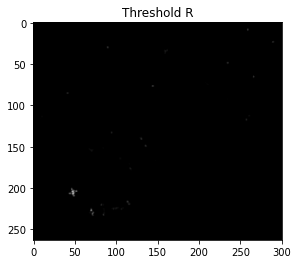

In [24]:
w, h = R.shape
R_thresh = np.zeros((w, h), np.float64)

#set threshold
thresh = 0.01 * R.max()

#threshold corner response R
for i in range(w):
  for j in range(h):
    if R[i][j] > thresh:
      R_thresh[i][j] = R[i][j]

#show threshold result
plt.imshow(R_thresh, cmap='gray')
plt.title("Threshold R")
plt.show()

#### e. Find local maxima of response function (non-maximum suppression)


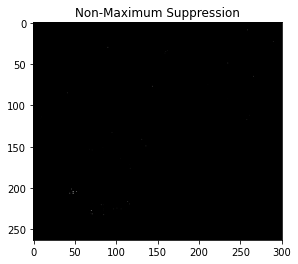

In [25]:
R_NMS = R_thresh.copy()

#perform non-maxima suppression
for i in range(w):
  for j in range(h):
    if R_thresh[i][j] != 0:
      #loop through the 3x3 neighborhood of the pixel
      for k in range(i-1, i+2):
        for l in range(j-1, j+2):
          if k >= 0 and k < w and l >= 0 and l < h:
            if R_thresh[i][j] < R_thresh[k][l]:
              R_NMS[i][j] = 0
              break

#show NMS result
plt.imshow(R_NMS, cmap='gray')
plt.title("Non-Maximum Suppression")
plt.show()

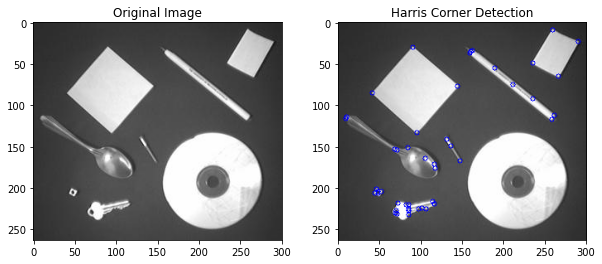

In [26]:
I_res = crn_img.copy()

#draw keypoints to image
for i in range(w):
  for j in range(h):
    if R_NMS[i][j] != 0:
      cv.circle(I_res, (j, i), 3, [0, 0, 255], 1)

#show final result
plt.figure(figsize=(10,4))

plt.subplot(1, 2, 1)
plt.imshow(crn_img)
plt.title("Original Image")

plt.subplot(1, 2, 2)
plt.imshow(I_res)
plt.title("Harris Corner Detection")
plt.show()

## 5. RANSAC algorithm

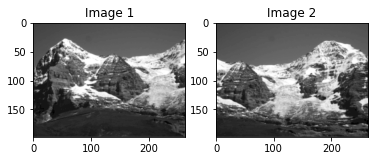

In [27]:
#read images in grayscale
stitch_img_1 = cv.imread('stitch1.png', 0)
stitch_img_2 = cv.imread('stitch2.png', 0)

#show images
plt.subplot(1, 2, 1)
plt.imshow(stitch_img_1, cmap='gray')
plt.title('Image 1')

plt.subplot(1, 2, 2)
plt.imshow(stitch_img_2, cmap='gray')
plt.title('Image 2')

plt.show()

In [28]:
#create sift detector
sift = cv.SIFT_create()

#find keypoints using sift detector
kp1, desc1 = sift.detectAndCompute(stitch_img_1, None)
kp2, desc2 = sift.detectAndCompute(stitch_img_2, None)

#create Matcher
bf = cv.BFMatcher()

#find matches between the two image descriptors
raw_matches = bf.knnMatch(desc1,desc2,k=2)

#find good matches using lowe's ratio test
matches = []
for m,n in raw_matches:
    if m.distance < 0.75*n.distance:
        matches.append(m)

Homography Matrix =
[[ 1.12161063e+00 -5.78911134e-02 -1.07203842e+02]
 [ 1.07998238e-01  1.06901291e+00 -1.94666101e+00]
 [ 5.23919826e-04 -1.15642169e-04  1.00000000e+00]]


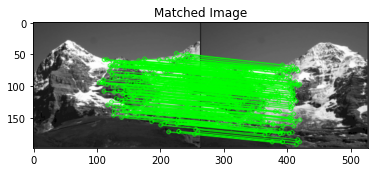

In [29]:
pts1 = np.float32([ kp1[m.queryIdx].pt for m in matches ]).reshape(-1,1,2)
pts2 = np.float32([ kp2[m.trainIdx].pt for m in matches ]).reshape(-1,1,2)

#find homography matrix using RANSAC algorithm
M, mask = cv.findHomography(pts1, pts2, cv.RANSAC, 5.0)
matchesMask = mask.ravel().tolist()

#print homography matrix
print('Homography Matrix =')
print(M)

#draw matches on images
draw_params = dict(matchColor = (0,255,0), singlePointColor = None, 
                   matchesMask = matchesMask, flags = 2)
imgMatch = cv.drawMatches(stitch_img_1, kp1,stitch_img_2, kp2, 
                          matches, None, **draw_params)

#show result image
plt.imshow(imgMatch)
plt.title('Matched Image')
plt.show()